In [1]:
#! usr/bin/env python3
import praw
import pandas as pd
import datetime as dt

reddit = praw.Reddit(client_id='nf62vapW5tB5dg', \
                     client_secret='vG5j7NEwCaZRnCihRRh3L5xbGrw', \
                     user_agent='ht_hw10', \
                     username='xil4001', \
                     password='Liqian712')
#print(reddit.read_only) 


In [2]:
subreddit = reddit.subreddit('stopdrinking')

print(subreddit.display_name)
print(subreddit.title)         
print(subreddit.description) 

stopdrinking
/r/stopdrinking: a support group in your pocket!
This subreddit is a place to motivate each other to control or stop drinking. We welcome anyone who wishes to join in by asking for advice, sharing our experiences and stories, or just encouraging someone who is trying to quit or cut down.

For everyone on the subreddit, and for the sake of your own recovery, only participate here when you're sober. [(?)](/r/stopdrinking/wiki/mute)  

*  **[Community Guidelines and FAQ](http://is.gd/sdfaq)**

* [Recent comments](/r/stopdrinking/comments)
* [Check-in](http://is.gd/afsucks)  ([?](http://is.gd/forrealz))

* [Wisdom](/7jbb0i), [Roll Call](/4hpgs9/), [Books](/r/stopdrinking/wiki/books), [Video](/r/stopdrinking/wiki/video), [Music](/r/stopdrinking/wiki/music), [Comics](/r/stopdrinking/wiki/comics), [Humor](http://is.gd/sdhaha), [Science](http://is.gd/blindme), [Reports](http://is.gd/UeFdRx), [Military](/r/stopdrinking/wiki/military), [Book Club](https://www.reddit.com/r/SDbookclub

In [3]:
topics_dict = { "title":[], 
                "score":[], 
                "id":[], "url":[],  
                "comms_num": [], 
                "created": [], 
                "body":[]}

In [4]:
for submission in reddit.subreddit('stopdrinking').hot(limit=1000):
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [5]:
topics_data = pd.DataFrame(topics_dict)

In [6]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = topics_data["created"].apply(get_date)
topics_data = topics_data.assign(timestamp = _timestamp)
topics_data

,title,score,id,url,comms_num,created,body,timestamp
0,"The Vent-o-Matic 3000 for Friday April 19, 2019",14,beuffa,https://www.reddit.com/r/stopdrinking/comments...,43,1.555643e+09,***The Vent-o-Matic 3000 is back by popular de...,2019-04-18 23:07:23
1,"The Daily Check-In for Friday, April 19, 2019:...",48,bevrl8,https://www.reddit.com/r/stopdrinking/comments...,339,1.555653e+09,*We may be anonymous strangers on the internet...,2019-04-19 01:53:59
2,There are two things an alcoholic doesn’t like.,615,bezj3t,https://www.reddit.com/r/stopdrinking/comments...,49,1.555683e+09,"Change, and the way things are.\n\n\nGreat jok...",2019-04-19 10:10:06
3,Ten years sober today.,40,bf4jqz,https://www.reddit.com/r/stopdrinking/comments...,9,1.555709e+09,I have hit a great milestone in my recovery t...,2019-04-19 17:26:41
4,"Today, I’m my sister’s maid of honor 😭",59,bf1xpm,https://www.reddit.com/r/stopdrinking/comments...,10,1.555695e+09,I am so fucking grateful to be sober and prese...,2019-04-19 13:37:14
5,My girlfriend,119,beyj8l,https://www.reddit.com/r/stopdrinking/comments...,16,1.555677e+09,So recently my girlfriend hit 7 months complet...,2019-04-19 08:28:14
6,Just hit six weeks sober. Got my bronze chip.,500,beui24,https://www.reddit.com/r/stopdrinking/comments...,41,1.555644e+09,Lost weight.\nFeel great.\nLife is now on easy...,2019-04-18 23:15:16
7,I made it to day six...,43,bf0quk,https://www.reddit.com/r/stopdrinking/comments...,10,1.555689e+09,...and I have accomplished so much! \n\n“High ...,2019-04-19 11:56:50
8,It’s Friday - lets (not) drink!,14,bf49fu,https://www.reddit.com/r/stopdrinking/comments...,11,1.555708e+09,First week sober. 5:00 pm. Close up the laptop...,2019-04-19 17:00:14
9,I’m not sure if I should make this post (relap...,94,bexlbd,https://www.reddit.com/r/stopdrinking/comments...,28,1.555670e+09,I quit drinking for almost six years and then ...,2019-04-19 06:25:53


In [7]:
title_list =''
for i in topics_data['title']:
    title_list +=i+' '

In [8]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords  



porter = PorterStemmer()
lancaster=LancasterStemmer()

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(title_list)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
new = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
for w in filtered_sentence:
    if w not in punctuations:
        new.append(w)

titles = " ".join(new)

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(titles)
token = word_tokenize(x)

In [9]:
from collections import Counter 
Counter = Counter(token)
most_occur = Counter.most_common(100) 
print(most_occur) 

[('I', 341), ('day', 271), ('drink', 120), ('’', 96), ('...', 84), ('sober', 82), ('today', 81), ('feel', 44), ('month', 40), ('one', 39), ('year', 38), ('first', 38), ('1', 37), ('alcohol', 36), ("'m", 36), ('time', 35), ('2', 35), ('stop', 34), ('get', 33), ('3', 30), ('week', 29), ('just', 28), ('help', 28), ('``', 28), ('A', 27), ('need', 27), ('quit', 26), ("n't", 26), ('last', 25), ('want', 24), ("'s", 23), ('the', 22), ('It', 22), ('how', 22), ('two', 21), ('back', 21), ('go', 20), ('think', 20), ('My', 19), ('almost', 18), ('life', 18), ('5', 18), ('night', 18), ('work', 18), ('post', 17), ('relaps', 17), ('start', 17), ('tri', 17), ('4', 17), ('hard', 17), ('sobrieti', 17), ('what', 16), ('peopl', 16), ('not', 15), ('made', 15), ('thank', 15), ('friend', 15), ('like', 14), ('know', 14), ('without', 14), ('got', 13), ('make', 13), ('thi', 13), ('done', 13), ('crave', 13), ('6', 13), ('realli', 13), ('thing', 12), ('let', 12), ('advic', 12), ('final', 12), ('still', 12), ('anoth

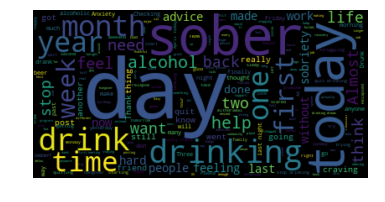

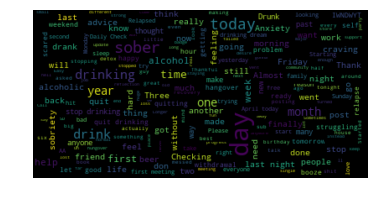

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(title_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud = WordCloud(max_font_size=30).generate(title_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
content_list = ''
for i in topics_data['body']:
    content_list +=i+' '
    
    
porter = PorterStemmer()
lancaster=LancasterStemmer()

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(content_list)
filtered_sentence_2 = [w for w in word_tokens if not w in stop_words]
filtered_sentence_2= []
new_2 = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
for w in filtered_sentence:
    if w not in punctuations:
        new.append(w)

content = " ".join(new)

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

x=stemSentence(content)
content_token = word_tokenize(x)

In [18]:
from collections import Counter 
Counter = Counter(content_token)
most_occur_content = Counter.most_common(100) 
print(most_occur_content) 

[('I', 30828), ('’', 6873), ('drink', 5505), ('day', 4320), ("n't", 2814), ('feel', 2514), ("'m", 2310), ('time', 2271), ('get', 2052), ('go', 2010), ("'s", 1914), ('like', 1911), ('alcohol', 1734), ('sober', 1695), ('one', 1647), ('know', 1641), ('want', 1560), ('It', 1545), ('today', 1461), ('year', 1455), ('``', 1419), ("'ve", 1296), ('work', 1254), ('life', 1248), ('realli', 1173), ('...', 1161), ('would', 1116), ('last', 1104), ('start', 1092), ('week', 1068), ('night', 1068), ('even', 1065), ('make', 1026), ('tri', 1023), ('think', 1020), ('thing', 1017), ('much', 993), ('stop', 981), ('back', 963), ('help', 945), ('My', 924), ('the', 909), ('need', 906), ('month', 903), ('still', 903), ('but', 894), ('peopl', 873), ('friend', 870), ('good', 867), ('first', 825), ('quit', 819), ('never', 807), ('got', 789), ('post', 693), ('take', 681), ('thank', 678), ('could', 669), ('everi', 663), ('thought', 660), ('better', 645), ('say', 645), ('and', 645), ('iwndwyt', 624), ('thi', 618), ('

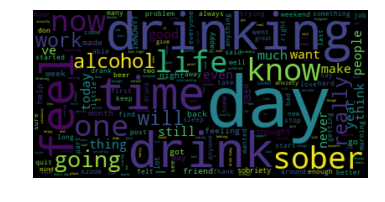

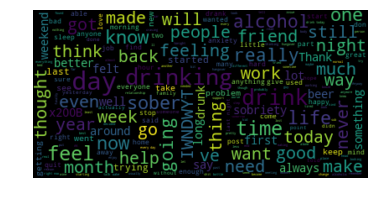

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(content_list)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud = WordCloud(max_font_size=30).generate(content_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()